In [0]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import zipfile
 
try:
    with zipfile.ZipFile("/content/drive/My Drive/Final_Project/original_data20.zip") as zf:
        zf.extractall('data')
        print("uncompress success")
 
except:
    print("uncompress fail")



uncompress success


In [0]:
# H 정상, D01 궤양병, D04 잎곰팡이병, D05 점무늬병, D07 토마토퇴록바이러스
# D08 황화잎말림바이러스, D09 흰가루병
# P03 아메리카잎굴파리, P05 청벌레
# Tomato_?? 형식

def get_images(directory):
    count = 0
    Images = []
    Labels = []
    label = 0
    
    try:
      for labels in os.listdir(directory): 
          count += 1
          if labels == 'Tomato_H':
              label = 0
          elif labels == 'Tomato_D01':
              label = 1
          elif labels == 'Tomato_D04':
              label = 2
          elif labels == 'Tomato_D05':
              label = 3
          elif labels == 'Tomato_D07':
              label = 4
          elif labels == 'Tomato_D08':
              label = 5
          elif labels == 'Tomato_D09':
              label = 6
          elif labels == 'Tomato_P03':
              label = 7
          elif labels == 'Tomato_P05':
              label = 8


          for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
              image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
              image = cv2.resize(image,(1024,1024))
              Images.append(image)
              Labels.append(label)
              
      return shuffle(Images,Labels,random_state=817328462)
    except Exception as e:
      print(str(e))



def get_classlabel(class_code):
    labels = {0: 'Tomato_H', 1: 'Tomato_D01', 2: 'Tomato_D04', 3: 'Tomato_D05', 
             4: 'Tomato_D07', 5: 'Tomato_D08', 6: 'Tomato_D09', 7: 'Tomato_P03', 
             8: 'Tomato_P05'}
    return labels[class_code]

In [79]:
count

0

In [82]:
Images, Labels = get_images('./data/train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



TypeError: ignored

In [60]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (181,)
Shape of Labels: (181,)


In [61]:
len(Images)

181

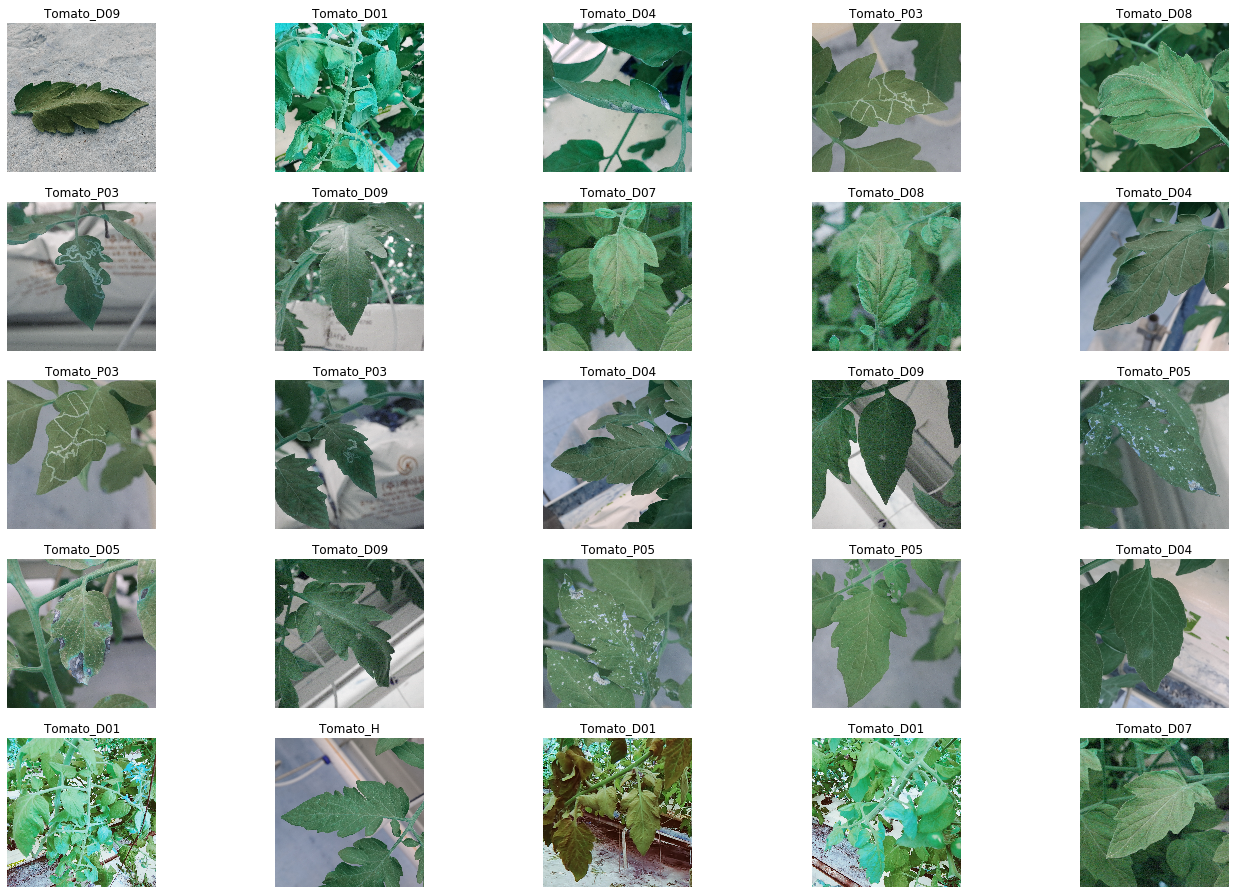

In [62]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5):
    for j in range(0,5):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [0]:
import tensorflow as tf
model = Models.Sequential()


model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(1024,1024,3),
                        kernel_regularizer = tf.keras.regularizers.l2(0.001),
                       kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False)))
model.add(tf.keras.layers.BatchNormalization()) 
model.add(Layers.Conv2D(180,kernel_size=(3,3), activation='relu',))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Dropout(rate=0.25))
model.add(Layers.Conv2D(180,kernel_size=(3,3 ), activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3), activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3), activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3), activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Dropout(rate=0.25))
model.add(Layers.Flatten())

model.add(Layers.Dense(180, activation='relu'))
model.add(Layers.Dense(100, activation='relu'))
model.add(Layers.Dense(50, activation='relu'))
model.add(Layers.Dropout(rate=0.3))

model.add(Layers.Dense(9,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
#SVG(model_to_dot(model).create(prog='dot', format='svg'))









#Utils.plot_model(model,to_file='model.png',show_shapes=True)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 254, 254, 200)     5600      
_________________________________________________________________
batch_normalization_12 (Batc (None, 254, 254, 200)     800       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 252, 252, 180)     324180    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 50, 50, 180)       0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 50, 50, 180)       0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 48, 48, 180)       291780    
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 46, 46, 140)     

In [0]:
trained = model.fit(Images, Labels, epochs=87, validation_split=0.2)

Train on 129 samples, validate on 33 samples
Epoch 1/100
129/129 [==============================] - 3s 24ms/sample - loss: 2.3471 - acc: 0.1163 - val_loss: 2.4753 - val_acc: 0.1212
Epoch 2/100
129/129 [==============================] - 2s 18ms/sample - loss: 2.1652 - acc: 0.1628 - val_loss: 2.2675 - val_acc: 0.1515
Epoch 3/100
129/129 [==============================] - 2s 18ms/sample - loss: 2.2176 - acc: 0.1085 - val_loss: 2.1854 - val_acc: 0.1515
Epoch 4/100
129/129 [==============================] - 2s 18ms/sample - loss: 2.1630 - acc: 0.1240 - val_loss: 2.2175 - val_acc: 0.1515
Epoch 5/100
129/129 [==============================] - 2s 18ms/sample - loss: 2.1913 - acc: 0.1085 - val_loss: 2.2495 - val_acc: 0.1515
Epoch 6/100
129/129 [==============================] - 2s 18ms/sample - loss: 2.1400 - acc: 0.1318 - val_loss: 2.2153 - val_acc: 0.1515
Epoch 7/100
129/129 [==============================] - 2s 18ms/sample - loss: 2.1393 - acc: 0.1628 - val_loss: 2.1782 - val_acc: 0.1515
Epo

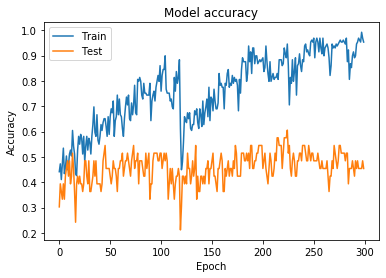

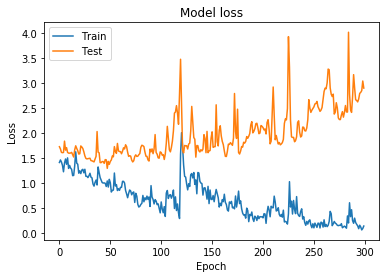

In [0]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [0]:
test_images,test_labels = get_images('./test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

18/18 [==============================] - 1s 38ms/sample - loss: 3.8673 - acc: 0.4444


[3.8673455715179443, 0.44444445]

In [0]:
len(test_images)

18

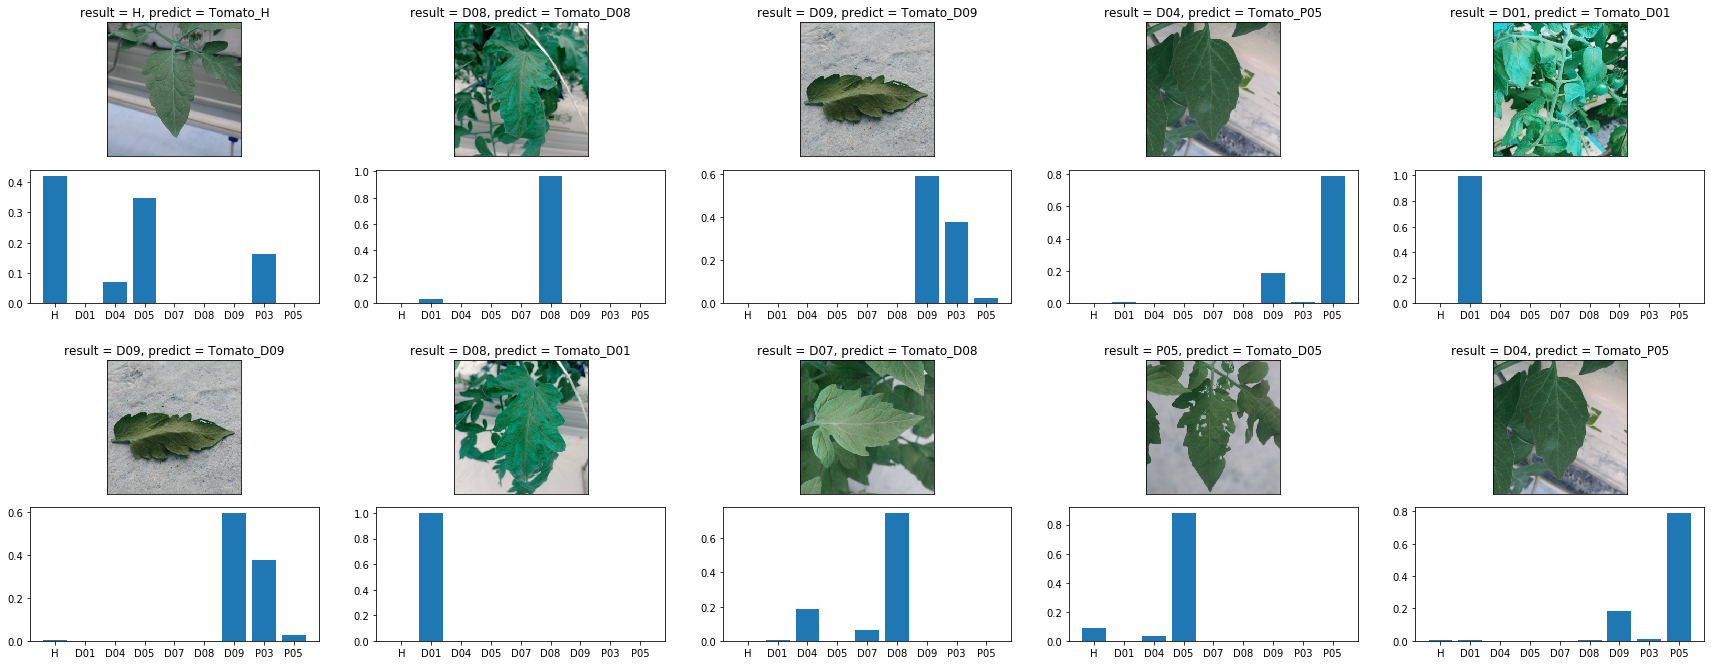

In [0]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(10):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(test_images)) # 0~18 중 하나를 뽑는 난수 생성
    pred_image = np.array([test_images[rnd_number]]) # test_images[random] 하나 뽑아서 넘파이로 변경\
    result = ['H', 'D01', 'D04', 'D05', 'D07', 'D08', 'D09', 'P03', 'P05'][test_labels[rnd_number]]
    pred_class = get_classlabel(model.predict_classes(pred_image)[0]) # 추측해서 가장 높은 값이 나온 거 위치 반환
    pred_prob = model.predict(pred_image).reshape(9)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title('result = {}, predict = {}'.format(result, pred_class))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar(['H', 'D01', 'D04', 'D05', 'D07', 'D08', 'D09', 'P03', 'P05'],pred_prob)
            fig.add_subplot(ax)


fig.show()